In [8]:
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

### 데이터생성

In [3]:
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size=500), columns=['점수'])

scores = np.array(math_score['점수'])

In [4]:
# 20개(n)의 표본 100번 추출
n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores, n).mean() for _ in range(nSample)])

# 구간 추정 실습
## 2. 신뢰구간 추정
### 1) 모평균의 신뢰구간 추정
 - 샘플 수 < 30, t통계량 이용

In [5]:
from scipy.stats import t
t_95 = t.ppf(1 - (1 - 0.95) / 2, df = 20-1)

In [6]:
t_95

2.093024054408263

In [11]:
# 20개(n)의 표본 100개를 추출
# 95% 신뢰구간 추정 : t통계량 2.093

sMean = sample_mean.mean()
sStd = sample_mean.std()

Low_c = sMean - t_95 * (sStd / math.sqrt(n))
Upper_c = sMean + t_95 * (sStd / math.sqrt(n))
print(Low_c)
print(Upper_c)

# 95% 신뢰로 모평균은 59점 ~ 64점 사이에 존재(추정)
print('신뢰구간 :', Upper_c-Low_c)

59.199271219270706
63.951728780729304
신뢰구간 : 4.752457561458598


### 2) 모평균의 신뢰구간 추정
$$샘플수 \geq30, 통계량 이용 $$  

In [13]:
# 30개(n)의 표본 1개를 추출
# 95% 신뢰구간 추정 : z통계량 1.96

z_n = 30
sample1 = np.random.choice(scores, n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균', scores.mean())
print('표본평균', z_sMean)
print('모편차', scores.std())
print('표본편차', z_sStd)

모평균 61.58
표본평균 68.0
모편차 21.491849617936563
표본편차 19.73575435599055


In [24]:
# 임계값
z_95 = stats.norm.ppf(1 - (1 - 0.95) / 2) # 양측검정

# z_95_h = stats.norm.ppf(0.95) # 단축검정
# print(z_95_h)

In [25]:
L_value_1 = round(z_sMean - z_95 * (scores.std() / math.sqrt(z_n)), 2)
U_value_1 = round(z_sMean + z_95 * (scores.std() / math.sqrt(z_n)), 2)
print(L_value_1)
print(U_value_1)

print('신뢰구간 :', U_value_1 - L_value_1)

60.31
75.69
신뢰구간 : 15.379999999999995


## 예제
 - 어느 고등학교 남학생 49명의 제자리에서 멀리뛰기 기록은 평균 205cm, 표준편차가 5cm이었다.
    이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 신뢰도 95% 신뢰구간을 구하라

In [27]:
# 모평균, 모표준편차, 표본 수
mStd = 5
mMean = 205
n = 49

# z통계량 : 1.96
z_95_1 = stats.norm.ppf(1 - (1 - 0.95) / 2) # 신뢰구간

# 신뢰구간 계산
L_value = round(mMean - z_95_1 * (mStd / math.sqrt(n)), 2)
U_value = round(mMean + z_95_1 * (mStd / math.sqrt(n)), 2)

print('신뢰구간 :', L_value, '~', U_value)
print('신뢰구간 길이 :', U_value - L_value)

print("{} < {} < {}".format(L_value, mMean, U_value))

신뢰구간 : 203.6 ~ 206.4
신뢰구간 길이 : 2.8000000000000114
203.6 < 205 < 206.4


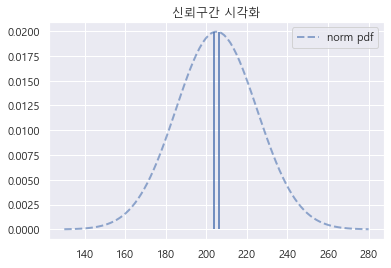

In [28]:
# 시각화
standart_norm = stats.norm(205, 20)

# standard_sr = stats.norm.rcv()
x = np.linspace(130, 280, 100)

plt.vlines(L_value, 0, standart_norm.pdf(L_value), colors='b')
plt.vlines(U_value, 0, standart_norm.pdf(U_value), colors='b')
plt.plot(x, standart_norm.pdf(x), 'b--', lw=2, alpha=0.6, label='norm pdf')

plt.title('신뢰구간 시각화')
plt.legend()
plt.show()